In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Reading the CSV file with different encodings
try_encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

for encoding in try_encodings:
    try:
        data = pd.read_csv(r"C:\Users\path.csv", encoding=encoding)
        print(encoding)
        break  # Stop if successful
    except UnicodeDecodeError:
        continue

latin1


In [8]:
try_encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
data = pd.read_csv(r"C:\Users\MiQDAD\Desktop\Data Analysis\Python\Ecommerce Project\archive (1)\Amazon Sale Report.csv", encoding='latin1')
data


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,Mumbai,Maharashtra,400081,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,Bengaluru,Karnataka,560085,IN,Amazon PLCC Free-Financing Universal Merchant,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,Navi Mumbai,Maharashtra,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,Puducherry,Puducherry,605008,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,Chennai,Tamil Nadu,600073,IN,NaN,False,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128933,128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,Hyderabad,Telangana,500013,IN,NaN,False,Amazon
128934,128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,Gurugram,Haryana,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
128935,128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,Hyderabad,Telangana,500049,IN,NaN,False,Amazon
128936,128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon


In [9]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
# data = data.set_index('Date')
data.set_index('Date', inplace=True) 

# Group data by month and calculate total sales
# 'M' stands for month
monthly_sales = data.resample('M').sum() 

# Print the first few rows of the monthly sales data
print(monthly_sales.head())


                 index    Qty       Amount  ship-postal-code  B2B
Date                                                             
2022-03-31     8372844    156    101683.85          81151433    0
2022-04-30  1211420327  44196  28831249.32       22779965376  349
2022-05-31  2948235359  37999  26218621.75       19347388917  282
2022-06-30  4146750335  34267  23419916.38       17615352681  240


C:\Users\MiQDAD\AppData\Local\Temp\ipykernel_8688\3618986490.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = data.resample('M').sum()


In [ ]:
data

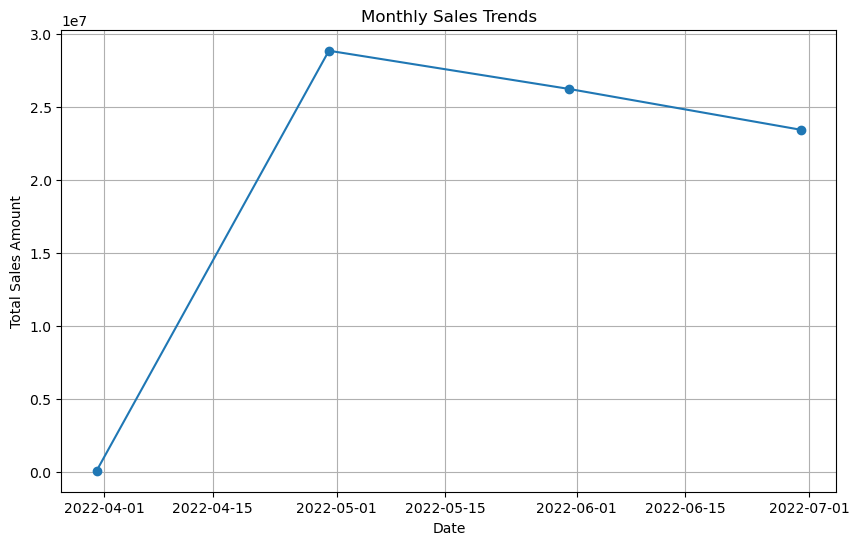

In [10]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Amount'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

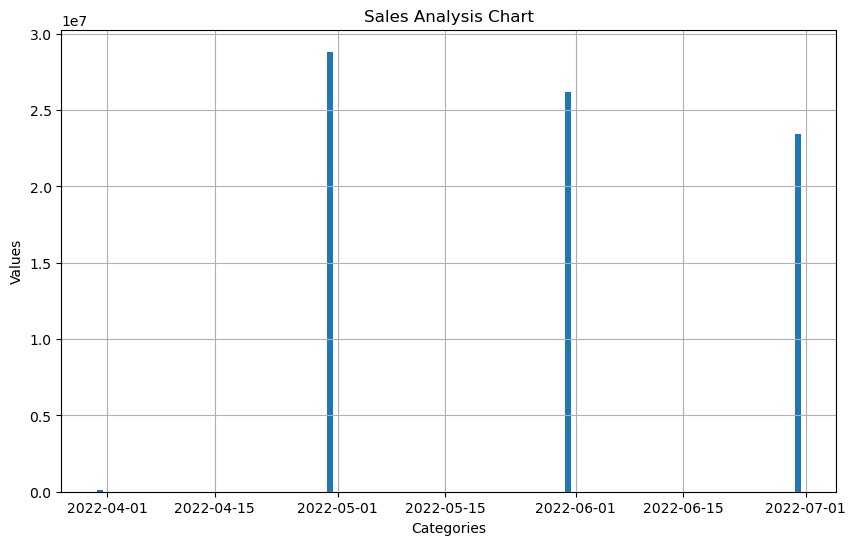

In [12]:
# Creat a bar chart
plt.figure(figsize=(10, 6))
# plt.plot(kind='bar', color='green')
plt.bar(monthly_sales.index, monthly_sales['Amount'])
plt.title('Sales Analysis Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.grid(True)

# Display the plot
plt.show()

In [13]:
# Group data by 'Fulfilled By' and calculate total sales
vendor_sales = data.groupby('fulfilled-by')['Amount'].sum()

# Print the vendor sales data
print(vendor_sales)


fulfilled-by
Amazon       54310752.0
Easy Ship    24260719.3
Name: Amount, dtype: float64


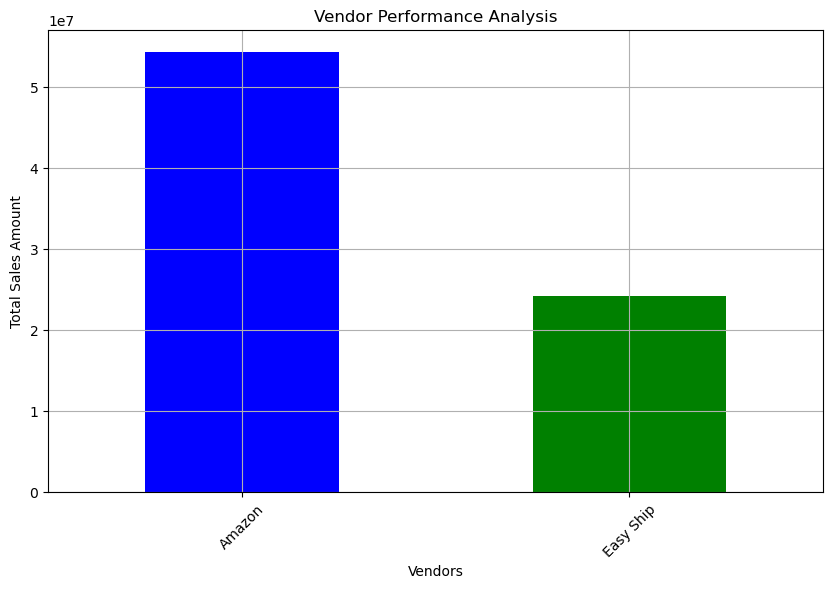

In [14]:
# Define colors for each vendor
vendors = ['Amazon', 'Easy Ship']
colors = ['blue', 'green']
# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Create a bar chart for vendor sales
vendor_sales.plot(kind='bar', color=colors)
plt.title('Vendor Performance Analysis')
plt.xlabel('Vendors')
plt.ylabel('Total Sales Amount')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.grid(True)

# Display the plot
plt.show()
